# **Daily Minimum Temperatures Dataset**

## Hiểu dữ liệu (Dataset & Problem Definition)

### **Tải bộ dữ liệu**

In [ ]:
!gdown 1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX

Downloading...
From: https://drive.google.com/uc?id=1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX
To: /home/banhmuy/zero-to-hero/AIO2025/M03/tue_w01_practice/timeseries_daily-minimum-temperatures.csv
100%|███████████████████████████████████████| 55.9k/55.9k [00:00<00:00, 703kB/s]


### **Import thư viện và load dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đọc và chuyển đổi dữ liệu Date sang dạng datetime

In [4]:
DATASET_PATH = 'timeseries_daily-minimum-temperatures.csv'

In [ ]:
# Read data from .csv file
ts_df = pd.read_csv(DATASET_PATH, parse_dates=["Date"])

print(ts_df.shape)
print(ts_df.dtypes)
ts_df.head(3)

(3650, 2)
Date                          datetime64[ns]
Daily minimum temperatures            object
dtype: object


,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


Dữ liệu có 3650 dòng, 2 cột

In [13]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


- Không có dòng dữ liệu nào bị thiếu giá trị
- Không có dòng bị trùng lặp

In [15]:
print("Missing values:", ts_df.isnull().sum().values[0])
print("Duplicate rows:", ts_df.duplicated().sum())

Missing values: 0
Duplicate rows: 0


In [16]:
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
# ts_df = ts_df.set_index('Date')
ts_df.head(3)

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [ ]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
ts_df['Weekday Name'] = ts_df.index.day_name()

ts_df.sample(5, random_state=0)

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-08-20,9.7,1990,8,Monday
1982-07-24,6.6,1982,7,Saturday
1983-09-19,12,1983,9,Monday
1986-09-28,6.9,1986,9,Sunday
1988-01-12,18.3,1988,1,Tuesday


In [42]:
ts_df.dtypes

Daily minimum temperatures    object
Year                           int32
Month                          int32
Weekday Name                  object
dtype: object

In [43]:

ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'], errors='coerce')
ts_df.dtypes

Daily minimum temperatures    float64
Year                            int32
Month                           int32
Weekday Name                   object
dtype: object

In [44]:
ts_df.describe()

,Daily minimum temperatures,Year,Month
count,3647.000000,3650.000000,3650.000000
mean,11.186647,1985.500000,6.520548
std,4.061671,2.872675,3.447566
min,0.000000,1981.000000,1.000000
25%,8.300000,1983.000000,4.000000
50%,11.000000,1985.500000,7.000000
75%,14.000000,1988.000000,10.000000
max,26.300000,1990.000000,12.000000


### **Time-based indexing**

In [5]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Buộc cột nhiệt độ về dạng số (float), chuyển các giá trị không hợp lệ (như chuỗi header bị sót) thành NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)

In [6]:
ts_df.loc['1990-01-01':'1991-01-01']

,Daily minimum temperatures
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [7]:
ts_df.loc['1990-01']

,Daily minimum temperatures
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3
1990-01-06,15.3
1990-01-07,16.4
1990-01-08,14.8
1990-01-09,17.4


### **Frequencies**

In [11]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('2004-09-20', periods=8, freq='h')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [13]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['1981-01-01', '1981-01-04', '1981-01-08'])
# Select the specified dates and just the Consumption column
consum_sample = ts_df.loc[times_sample, ['Daily minimum temperatures']].copy()
consum_sample

,Daily minimum temperatures
1981-01-01,20.7
1981-01-04,14.6
1981-01-08,17.4


In [20]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Daily minimum temperatures - Forward Fill'] = consum_sample.asfreq(
    'D', method='ffill')
consum_freq

,Daily minimum temperatures,Daily minimum temperatures - Forward Fill
1981-01-01,20.7,20.7
1981-01-02,NaN,20.7
1981-01-03,NaN,20.7
1981-01-04,14.6,14.6
1981-01-05,NaN,14.6
1981-01-06,NaN,14.6
1981-01-07,NaN,14.6
1981-01-08,17.4,17.4


## Khám phá dữ liệu (Exploratory Data Analysis) và Feature Engineering

In [76]:
from matplotlib.dates import YearLocator, DateFormatter

# ==============================================================================
# THIẾT LẬP CẤU HÌNH TOÀN CỤC (GLOBAL CONFIGURATION)
# Mục đích: Tập trung tất cả các tham số của Mô hình Sinusoidal và Phân tích
# ==============================================================================
CONFIG = {
    # Cấu hình Mô hình Sinusoidal: y = A * sin(b*x + c) + d

    # BASE_TEMP_D (d): Nhiệt độ trung bình/Độ cao cơ sở hàng năm tại Melbourne: https://en.wikipedia.org/wiki/Climate_of_Melbourne
    "BASE_TEMP_D": 9.7,

    # AMPLITUDE_A (A): Biên độ dao động (Lý thuyết)
    # Dữ liệu lấy từ Wikipedia (Trung bình tối thiểu hàng tháng tại Sân bay Melbourne):
    # Nhiệt độ Min Max (Tháng 2) = 14.4 °C; Nhiệt độ Min Min (Tháng 7) = 5.8 °C.
    # Chênh lệch thực tế là (14.4 - 5.8) = 8.6 °C. Giá trị 8 °C được chọn để làm tròn và làm mượt biên độ này.
    "AMPLITUDE_A": 8,

    # DAYS_IN_YEAR (T): Chu kỳ của hàm Sin (365.25 ngày/năm)
    "DAYS_IN_YEAR": 365.25,

    # DAYS_TO_SHIFT_PEAK (c - tính bằng ngày): Dịch pha
    # Giá trị 60 ngày được sử dụng để dịch chuyển đỉnh sóng Sin (mùa nóng nhất) từ
    # vị trí mặc định (khoảng Tháng 4) về Tháng 2, phù hợp với dữ liệu khí hậu thực tế.
    "DAYS_TO_SHIFT_PEAK": 60,

    # Cấu hình Kỹ thuật Phân tích
    "ROLLING_WINDOW_DAYS": 30,      # Cửa sổ (số ngày) tính Trung bình Trượt

    # Cấu hình Ngôn ngữ/Hiển thị
    "MONTH_NAMES": {
        1: 'Tháng 1', 2: 'Tháng 2', 3: 'Tháng 3', 4: 'Tháng 4',
        5: 'Tháng 5', 6: 'Tháng 6', 7: 'Tháng 7', 8: 'Tháng 8',
        9: 'Tháng 9', 10: 'Tháng 10', 11: 'Tháng 11', 12: 'Tháng 12'
    }
}

# ------------------------------------------------------------------------------
print("\n--- 1. TÍNH TOÁN CÁC HẰNG SỐ DẪN XUẤT (DERIVED CONSTANTS) ---")
# Các tham số được chuyển đổi sang đơn vị radian cho hàm np.sin()

# ANGULAR_FREQUENCY_B (b): Tần số góc = 2*pi / Chu kỳ (365.25)
CONFIG["ANGULAR_FREQUENCY_B"] = (2 * np.pi) / CONFIG["DAYS_IN_YEAR"]
print(f"Tần số góc (b): {CONFIG['ANGULAR_FREQUENCY_B']:.6f}")

# PHASE_SHIFT_RADIAN_C (c - tính bằng radian): Dịch pha
CONFIG["PHASE_SHIFT_RADIAN_C"] = (2 * np.pi * CONFIG["DAYS_TO_SHIFT_PEAK"]) / CONFIG["DAYS_IN_YEAR"]
print(f"Dịch pha (c): {CONFIG['PHASE_SHIFT_RADIAN_C']:.6f} radians")


--- 1. TÍNH TOÁN CÁC HẰNG SỐ DẪN XUẤT (DERIVED CONSTANTS) ---
Tần số góc (b): 0.017202
Dịch pha (c): 1.032145 radians


In [77]:
# ==============================================================================
print("\n--- 2. PHẦN 1: DỮ LIỆU THỰC VÀ TÍNH TOÁN MÔ HÌNH ---")
# ==============================================================================

# 1. DỮ LIỆU THỰC TẾ
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Buộc cột nhiệt độ về dạng số (float), chuyển các giá trị không hợp lệ (như chuỗi header bị sót) thành NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)
# Loại bỏ các dòng bị NaN sau khi ép kiểu, đảm bảo chỉ còn dữ liệu số hợp lệ.
ts_df = ts_df.dropna(subset=['Daily minimum temperatures'])


--- 2. PHẦN 1: DỮ LIỆU THỰC VÀ TÍNH TOÁN MÔ HÌNH ---


### Feature Engineering

In [78]:
# 2. TÍNH TOÁN VÀ THÊM MÔ HÌNH SINUSOIDAL (SIGNAL) VÀO ts_df
# Chỉ số thời gian (x): Dựa trên độ dài dữ liệu thực tế đã được tải
time_index = np.arange(len(ts_df))

# Tính toán thành phần tín hiệu PURE SIGNAL MODEL (Sóng Sin)
model_signal = (
    CONFIG["BASE_TEMP_D"] +
    CONFIG["AMPLITUDE_A"] * np.sin(
        CONFIG["ANGULAR_FREQUENCY_B"] * time_index +
        CONFIG["PHASE_SHIFT_RADIAN_C"]
    )
)
print(f"Đã tính toán Mô hình Sinusoidal")

# Thêm cột Signal vào DataFrame đã tải để so sánh trực quan
ts_df["Signal"] = model_signal
print(f"Đã thêm cột Signal (Mô hình Lý thuyết) vào DataFrame ts_df.")

# ==============================================================================
print("\n--- 3. PHẦN 2: PHÂN TÍCH CHUỖI THỜI GIAN ---")
print("Kỹ thuật: Trung bình Trượt (Rolling Mean)")
# ==============================================================================
# Tính Trung bình Trượt trên DỮ LIỆU THỰC TẾ
ts_df['Rolling 30-Day Avg'] = ts_df['Daily minimum temperatures'].rolling(
    window=CONFIG["ROLLING_WINDOW_DAYS"],
    center=True
).mean()
print(f"Đã tính Trung bình Trượt {CONFIG['ROLLING_WINDOW_DAYS']}-Ngày cho Dữ liệu Thực tế.")

Đã tính toán Mô hình Sinusoidal
Đã thêm cột Signal (Mô hình Lý thuyết) vào DataFrame ts_df.

--- 3. PHẦN 2: PHÂN TÍCH CHUỖI THỜI GIAN ---
Kỹ thuật: Trung bình Trượt (Rolling Mean)
Đã tính Trung bình Trượt 30-Ngày cho Dữ liệu Thực tế.


In [79]:
# ==============================================================================
print("\n--- 4. PHẦN 3: PHÂN TÍCH THEO MÙA (MONTHLY ANALYSIS) ---")
# ==============================================================================

# Thực hiện phân tích trên DỮ LIỆU THỰC TẾ
ts_df['Month'] = ts_df.index.month
monthly_avg = ts_df.groupby('Month')['Daily minimum temperatures'].mean().reset_index()
monthly_avg['Month Name'] = monthly_avg['Month'].map(CONFIG["MONTH_NAMES"])
max_temp_month = monthly_avg.loc[monthly_avg['Daily minimum temperatures'].idxmax()]
min_temp_month = monthly_avg.loc[monthly_avg['Daily minimum temperatures'].idxmin()]
print("Đã thực hiện nhóm dữ liệu theo Tháng và tính Trung bình mỗi tháng trên DỮ LIỆU THỰC TẾ.")

# In kết quả phân tích ra Console
print("\n--- KẾT QUẢ PHÂN TÍCH NHIỆT ĐỘ TRUNG BÌNH THEO THÁNG (Dữ liệu Thực tế) ---")
print(f"Tháng NÓNG NHẤT (trung bình): {max_temp_month['Month Name']} ({max_temp_month['Daily minimum temperatures']:.2f} °C)")
print(f"Tháng LẠNH NHẤT (trung bình): {min_temp_month['Month Name']} ({min_temp_month['Daily minimum temperatures']:.2f} °C)")
print("---------------------------------------------------------------")


--- 4. PHẦN 3: PHÂN TÍCH THEO MÙA (MONTHLY ANALYSIS) ---
Đã thực hiện nhóm dữ liệu theo Tháng và tính Trung bình mỗi tháng trên DỮ LIỆU THỰC TẾ.

--- KẾT QUẢ PHÂN TÍCH NHIỆT ĐỘ TRUNG BÌNH THEO THÁNG (Dữ liệu Thực tế) ---
Tháng NÓNG NHẤT (trung bình): Tháng 2 (15.37 °C)
Tháng LẠNH NHẤT (trung bình): Tháng 7 (6.75 °C)
---------------------------------------------------------------


In [80]:
ts_df.describe()

,Daily minimum temperatures,Signal,Rolling 30-Day Avg,Month
count,3647.000000,3647.000000,3618.000000,3647.000000
mean,11.186647,9.690009,11.148601,6.520154
std,4.061671,5.656034,3.089969,3.448957
min,0.000000,1.700005,4.710000,1.000000
25%,8.300000,4.040109,8.364167,4.000000
50%,11.000000,9.682798,11.020000,7.000000
75%,14.000000,15.341629,13.753333,10.000000
max,26.300000,17.699995,17.966667,12.000000


### Phân tích Tính thời vụ (Seasonality Analysis) - EDA step

Đã vẽ Biểu đồ Chuỗi Thời gian (Dữ liệu Thực tế và Mô hình).


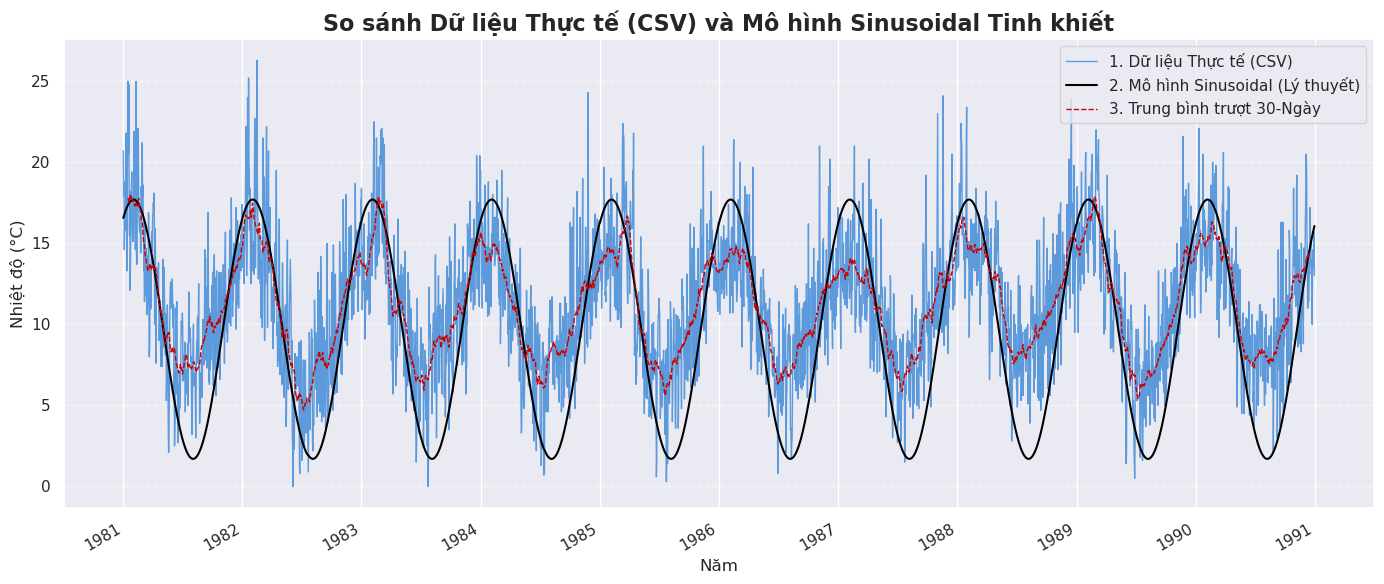

In [81]:
# Thiết lập biểu đồ
plt.figure(figsize=(14, 6))

# VẼ 1: DỮ LIỆU THỰC TẾ (Đọc từ CSV)
plt.plot(
    ts_df.index,
    ts_df["Daily minimum temperatures"],
    color="#0066CC",
    linewidth=1.0,
    alpha=0.6,
    label="1. Dữ liệu Thực tế (CSV)"
)

# VẼ 2: MÔ HÌNH LÝ THUYẾT (PURE SIGNAL) - Đường tham chiếu Sóng Sin
plt.plot(
    ts_df.index,
    ts_df["Signal"],
    color="#000000",
    linewidth=1.5,
    linestyle='-',
    label="2. Mô hình Sinusoidal (Lý thuyết)"
)

# VẼ 3: Trung bình trượt (Smoothed Data) - Làm mượt Dữ liệu Thực tế
plt.plot(
    ts_df.index,
    ts_df["Rolling 30-Day Avg"],
    color="#CC0000",
    linewidth=1.0,
    linestyle='--',
    label=f"3. Trung bình trượt {CONFIG['ROLLING_WINDOW_DAYS']}-Ngày"
)

# Cải thiện Trục X (Thời gian)
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Tiêu đề và chú thích
plt.title(
    "So sánh Dữ liệu Thực tế (CSV) và Mô hình Sinusoidal Tinh khiết",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Nhiệt độ (°C)", fontsize=12)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
print("Đã vẽ Biểu đồ Chuỗi Thời gian (Dữ liệu Thực tế và Mô hình).")

Đã vẽ Biểu đồ Thanh phân tích theo Tháng.


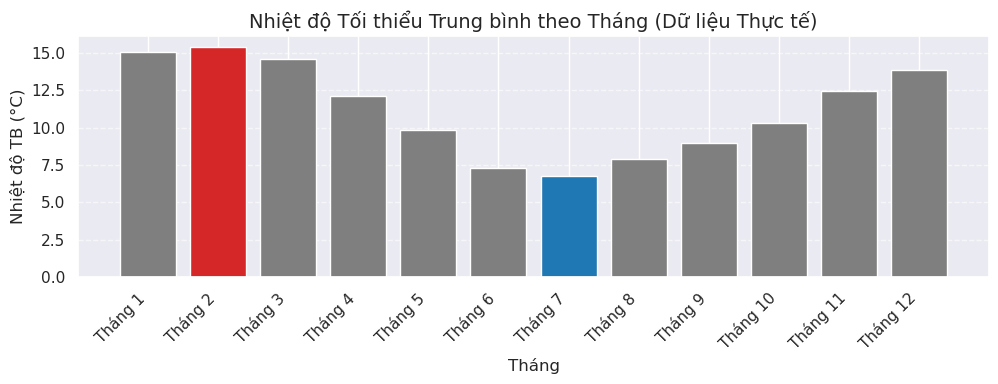

In [82]:
# VẼ BIỂU ĐỒ THANH CHO PHÂN TÍCH THEO THÁNG
plt.figure(figsize=(10, 4))
color_map = ['tab:red' if m == max_temp_month['Month Name'] else 'tab:blue' if m == min_temp_month['Month Name'] else 'tab:grey' for m in monthly_avg['Month Name']]

plt.bar(
    monthly_avg['Month Name'],
    monthly_avg['Daily minimum temperatures'],
    color=color_map
)
plt.title("Nhiệt độ Tối thiểu Trung bình theo Tháng (Dữ liệu Thực tế)", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Nhiệt độ TB (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
print("Đã vẽ Biểu đồ Thanh phân tích theo Tháng.")

# Hiển thị tất cả biểu đồ
plt.show()


Minh họa dữ liệu theo từng năm 

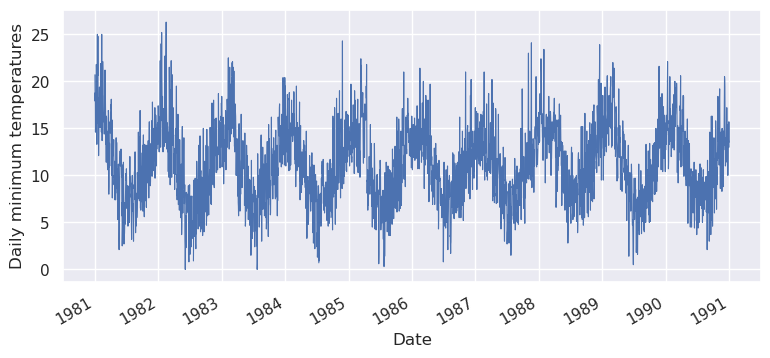

In [8]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Buộc cột nhiệt độ về dạng số (float), chuyển các giá trị không hợp lệ (như chuỗi header bị sót) thành NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)

sns.set(rc={'figure.figsize':(9, 4)})
col_to_plot = 'Daily minimum temperatures'
ts_df[col_to_plot].plot(linewidth=0.8)
plt.ylabel(col_to_plot)
plt.show()

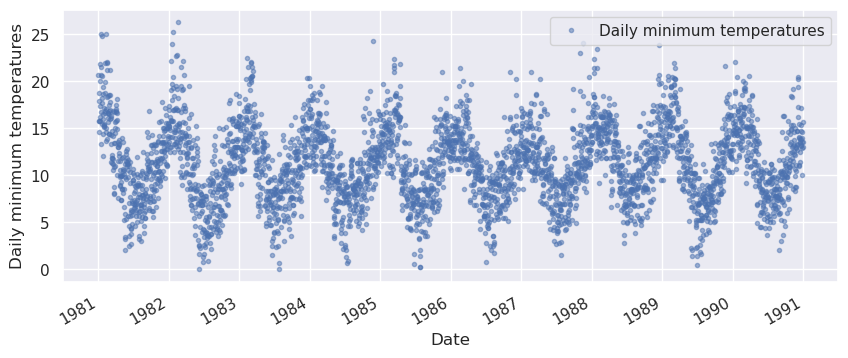

In [9]:
cols_plot = ['Daily minimum temperatures']
ts_df[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(10, 4),
    subplots=True
)
plt.ylabel('Daily minimum temperatures')
plt.show()

### **Phát hiện outliers**



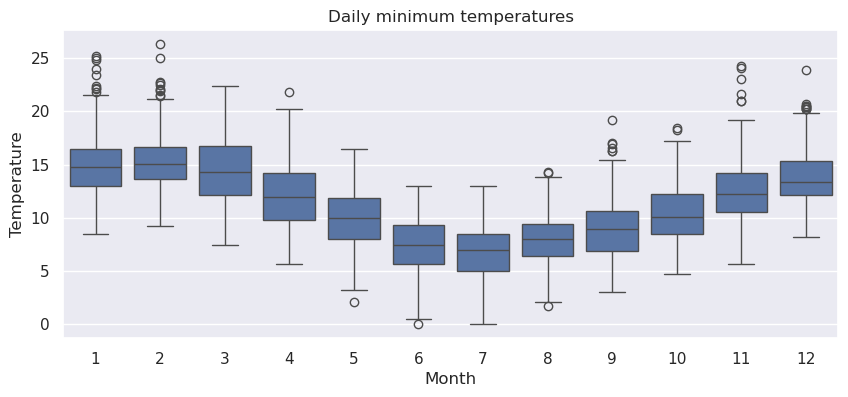

In [10]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
ts_df['Weekday Name'] = ts_df.index.day_name()
# Buộc cột nhiệt độ về dạng số (float), chuyển các giá trị không hợp lệ (như chuỗi header bị sót) thành NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)
COL_NAME = 'Daily minimum temperatures'
plt.figure(figsize=(10, 4))
sns.boxplot(data=ts_df, x='Month', y=COL_NAME)
plt.ylabel('Temperature')
plt.title(COL_NAME)
plt.show()

### **Resampling - Feature engineering** 

In [15]:
data_columns = ['Daily minimum temperatures']
ts_weekly_mean = ts_df[data_columns].resample('W').mean()
ts_weekly_mean.head(3)

,Daily minimum temperatures
Date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429


In [16]:
print(ts_df.shape[0])
print(ts_weekly_mean.shape[0])

3650
523


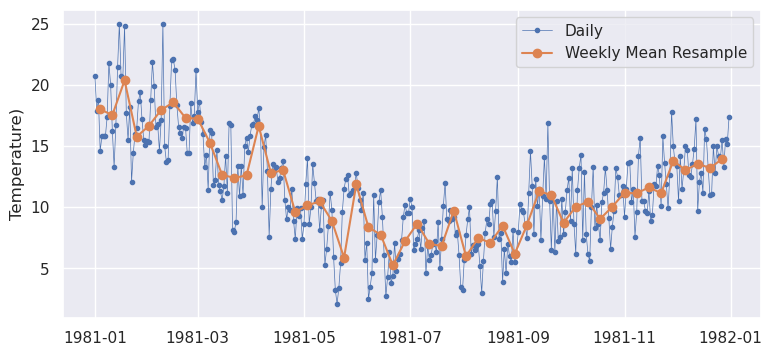

In [17]:
# Start and end of the date range to extract
start, end = '1981-01', '1981-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(ts_df.loc[start:end, 'Daily minimum temperatures'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_weekly_mean.loc[start:end, 'Daily minimum temperatures'],
marker='o', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature)')
ax.legend()
plt.show()

In [18]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year
# to the year component
ts_annual_df = ts_annual_df.set_index(ts_annual_df.index.year)
ts_annual_df.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
ts_annual_df.tail(3)

/tmp/ipykernel_142825/3750515818.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)


,Daily minimum temperatures
Year,
1988,4369.8
1989,4110.6
1990,4259.4


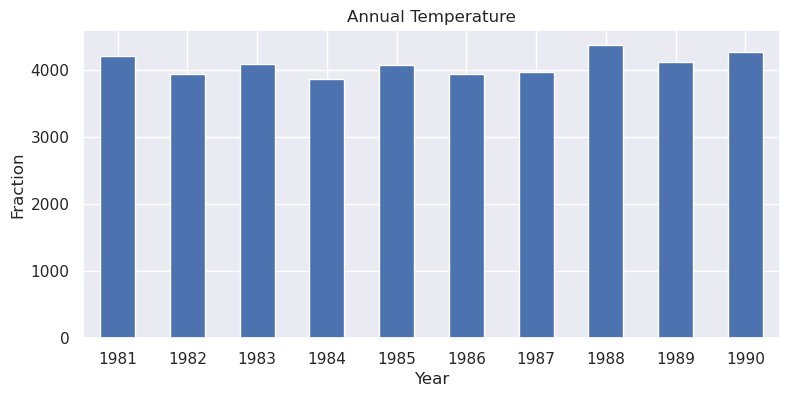

In [19]:
# Plot from 1981 onwards, because there is no solar production data in earlier years
ax = ts_annual_df.loc[1981:, 'Daily minimum temperatures'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_title('Annual Temperature')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu
df = pd.read_csv('timeseries_daily-minimum-temperatures.csv')

print("===== KIỂM TRA DỮ LIỆU BAN ĐẦU =====")
print(f"Shape: {df.shape}")
print(f"\nCác cột trong dataset:")
print(df.columns.tolist())
print(f"\nThông tin các cột:")
print(df.info())
print(f"\n5 dòng đầu:")
print(df.head())
print(f"\nKiểu dữ liệu:")
print(df.dtypes)

# Tự động tìm tên cột nhiệt độ (cột số không phải Date)
date_col = None
temp_col = None

for col in df.columns:
    col_lower = col.lower()
    if 'date' in col_lower:
        date_col = col
    elif df[col].dtype in ['float64', 'int64', 'float32', 'int32']:
        temp_col = col

# Nếu không tìm thấy, thử cột thứ 2
if temp_col is None:
    temp_col = df.columns[1]
if date_col is None:
    date_col = df.columns[0]

print(f"\n✓ Cột Date: {date_col}")
print(f"✓ Cột Temperature: {temp_col}")

# Chuyển đổi kiểu dữ liệu
df[date_col] = pd.to_datetime(df[date_col])
df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')

# Loại bỏ missing values
df = df.dropna()
df = df.sort_values(date_col)
df = df.reset_index(drop=True)

print(f"\nShape sau khi xử lý: {df.shape}")
print(f"Thống kê nhiệt độ:")
print(df[temp_col].describe())

# ===== FEATURE ENGINEERING =====

def create_time_series_features(df, target_col, date_col):
    """
    Tạo các features cho time series
    """
    df_features = df.copy()

    # 1. TIME-BASED FEATURES (Đặc trưng thời gian)
    df_features['year'] = df_features[date_col].dt.year
    df_features['month'] = df_features[date_col].dt.month
    df_features['day'] = df_features[date_col].dt.day
    df_features['dayofweek'] = df_features[date_col].dt.dayofweek
    df_features['dayofyear'] = df_features[date_col].dt.dayofyear
    df_features['quarter'] = df_features[date_col].dt.quarter
    df_features['weekofyear'] = df_features[date_col].dt.isocalendar().week.astype(int)

    # 2. CYCLIC FEATURES (Đặc trưng tuần hoàn)
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features['day_sin'] = np.sin(2 * np.pi * df_features['day'] / 31)
    df_features['day_cos'] = np.cos(2 * np.pi * df_features['day'] / 31)
    df_features['dayofyear_sin'] = np.sin(2 * np.pi * df_features['dayofyear'] / 365)
    df_features['dayofyear_cos'] = np.cos(2 * np.pi * df_features['dayofyear'] / 365)

    # 3. LAG FEATURES (Giá trị quá khứ)
    for lag in [1, 2, 3, 7, 14, 30]:
        df_features[f'temp_lag_{lag}'] = df_features[target_col].shift(lag)

    # 4. ROLLING WINDOW FEATURES (Đặc trưng cửa sổ trượt)
    for window in [3, 7, 14, 30]:
        df_features[f'temp_rolling_mean_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).mean()
        df_features[f'temp_rolling_std_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).std()
        df_features[f'temp_rolling_min_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).min()
        df_features[f'temp_rolling_max_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).max()

    # 5. EXPANDING WINDOW FEATURES (Đặc trưng mở rộng)
    df_features['temp_expanding_mean'] = df_features[target_col].expanding(min_periods=1).mean()
    df_features['temp_expanding_std'] = df_features[target_col].expanding(min_periods=1).std()

    # 6. DIFFERENCE FEATURES (Đặc trưng sự thay đổi)
    df_features['temp_diff_1'] = df_features[target_col].diff(1)
    df_features['temp_diff_7'] = df_features[target_col].diff(7)

    # 7. EXPONENTIAL WEIGHTED FEATURES
    df_features['temp_ewm_mean_7'] = df_features[target_col].ewm(span=7, min_periods=1).mean()
    df_features['temp_ewm_std_7'] = df_features[target_col].ewm(span=7, min_periods=1).std()

    return df_features

# Tạo features
print("\n===== TẠO FEATURES =====")
df_features = create_time_series_features(df, temp_col, date_col)

print(f"Số lượng features: {len(df_features.columns)}")
print(f"\nDanh sách features:")
for i, col in enumerate(df_features.columns, 1):
    print(f"{i}. {col}")

# Xử lý missing values
print(f"\n\nMissing values:")
missing_counts = df_features.isnull().sum()
if missing_counts.sum() > 0:
    print(missing_counts[missing_counts > 0].sort_values(ascending=False))
    df_features = df_features.dropna()
    print(f"\nShape sau khi xử lý missing values: {df_features.shape}")
else:
    print("Không có missing values!")

# ===== CHUẨN BỊ DỮ LIỆU CHO TRAINING =====

# Tách features và target
feature_columns = [col for col in df_features.columns if col not in [date_col, temp_col]]
X = df_features[feature_columns]
y = df_features[temp_col]

print(f"\n===== CHUẨN BỊ DỮ LIỆU =====")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Chia train/test theo thời gian (80/20)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train date range: {df_features[date_col].iloc[0]} to {df_features[date_col].iloc[split_idx-1]}")
print(f"Test date range: {df_features[date_col].iloc[split_idx]} to {df_features[date_col].iloc[-1]}")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển về DataFrame để giữ tên cột
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("\n===== DỮ LIỆU ĐÃ CHUẨN BỊ XONG =====")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print("\nMẫu dữ liệu X_train_scaled (5 dòng đầu):")
print(X_train_scaled.head())
print("\nThống kê y_train:")
print(y_train.describe())

# Kiểm tra không có NaN hoặc Inf
print("\n===== KIỂM TRA DỮ LIỆU =====")
print(f"NaN trong X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
print(f"NaN trong X_test_scaled: {X_test_scaled.isnull().sum().sum()}")
print(f"Inf trong X_train_scaled: {np.isinf(X_train_scaled.values).sum()}")
print(f"Inf trong X_test_scaled: {np.isinf(X_test_scaled.values).sum()}")

print("\n✅ Feature Engineering hoàn thành!")
print("\nCác biến đã tạo:")
print("- X_train_scaled, X_test_scaled: Features đã chuẩn hóa")
print("- y_train, y_test: Target values")
print("- scaler: StandardScaler object")
print("- df_features: DataFrame đầy đủ với tất cả features")
print(f"- temp_col = '{temp_col}'")
print(f"- date_col = '{date_col}'")

===== KIỂM TRA DỮ LIỆU BAN ĐẦU =====
Shape: (3650, 2)

Các cột trong dataset:
['Date', 'Daily minimum temperatures']

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB
None

5 dòng đầu:
       Date Daily minimum temperatures
0  1/1/1981                       20.7
1  1/2/1981                       17.9
2  1/3/1981                       18.8
3  1/4/1981                       14.6
4  1/5/1981                       15.8

Kiểu dữ liệu:
Date                          object
Daily minimum temperatures    object
dtype: object

✓ Cột Date: Date
✓ Cột Temperature: Daily minimum temperatures

Shape sau khi xử lý: (3647, 2)
Thống kê nhiệt độ:
count    3647.000000
m

## Training

### LinearRegression


===== TRAINING LINEAR REGRESSION =====

📊 Linear Regression (Train) Evaluation:
MAE  : 0.0000
RMSE : 0.0000
R²   : 1.0000

📊 Linear Regression (Test) Evaluation:
MAE  : 0.0000
RMSE : 0.0000
R²   : 1.0000


/tmp/ipykernel_142825/3589912151.py:50: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


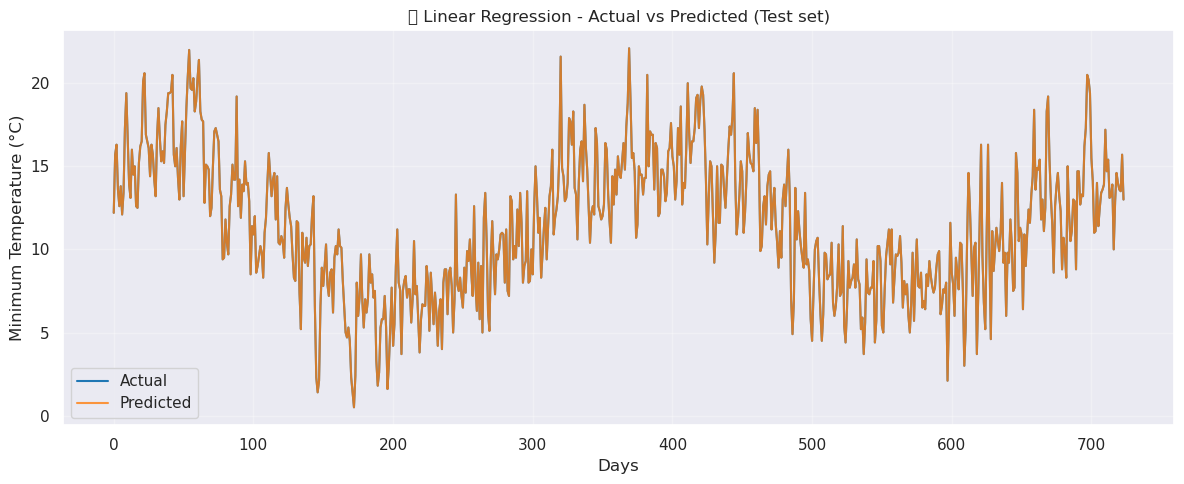


===== TOP 10 FEATURES QUAN TRỌNG =====
                Feature   Coefficient
13           temp_lag_1  1.598158e+00
37          temp_diff_1  1.470505e+00
16           temp_lag_7  1.379697e+00
19  temp_rolling_mean_3  1.378290e+00
38          temp_diff_7  1.308257e+00
14           temp_lag_2 -5.123627e-01
5               quarter -8.056056e-15
39      temp_ewm_mean_7  7.879114e-15
8             month_cos  6.160003e-15
12        dayofyear_cos -3.597816e-15

✅ Linear Regression training completed!
- Mô hình tuyến tính đơn giản, dễ hiểu, nhanh huấn luyện.
- Tuy nhiên, với dữ liệu Time Series có tính phi tuyến cao (seasonality rõ rệt), LR có thể dự báo chưa tốt ở các giai đoạn dao động mạnh.
- Bước tiếp theo: huấn luyện Random Forest và XGBoost để so sánh.


In [30]:
# ============================
# TRAIN LINEAR REGRESSION MODEL
# ============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Khởi tạo mô hình
model_lr = LinearRegression()

# Huấn luyện mô hình
print("\n===== TRAINING LINEAR REGRESSION =====")
model_lr.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

# ============================
# ĐÁNH GIÁ MÔ HÌNH
# ============================

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    return mae, rmse, r2

train_scores = evaluate_model(y_train, y_pred_train, "Linear Regression (Train)")
test_scores = evaluate_model(y_test, y_pred_test, "Linear Regression (Test)")

# ============================
# VẼ BIỂU ĐỒ DỰ BÁO
# ============================

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test, label="Predicted", color="tab:orange", alpha=0.8)
plt.title("📈 Linear Regression - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# KIỂM TRA CÁC HỆ SỐ (COEFFICIENTS)
# ============================

coef_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": model_lr.coef_
}).sort_values("Coefficient", key=lambda x: abs(x), ascending=False)

print("\n===== TOP 10 FEATURES QUAN TRỌNG =====")
print(coef_df.head(10))

# ============================
# KẾT LUẬN TẠM THỜI
# ============================

print("\n✅ Linear Regression training completed!")
print("- Mô hình tuyến tính đơn giản, dễ hiểu, nhanh huấn luyện.")
print("- Tuy nhiên, với dữ liệu Time Series có tính phi tuyến cao (seasonality rõ rệt), LR có thể dự báo chưa tốt ở các giai đoạn dao động mạnh.")
print("- Bước tiếp theo: huấn luyện Random Forest và XGBoost để so sánh.")



### Random Forest


===== TRAINING RANDOM FOREST =====

📊 Random Forest (Train) Evaluation:
MAE  : 0.0870
RMSE : 0.1445
R²   : 0.9987

📊 Random Forest (Test) Evaluation:
MAE  : 0.2236
RMSE : 0.3468
R²   : 0.9928


/tmp/ipykernel_142825/374075239.py:51: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


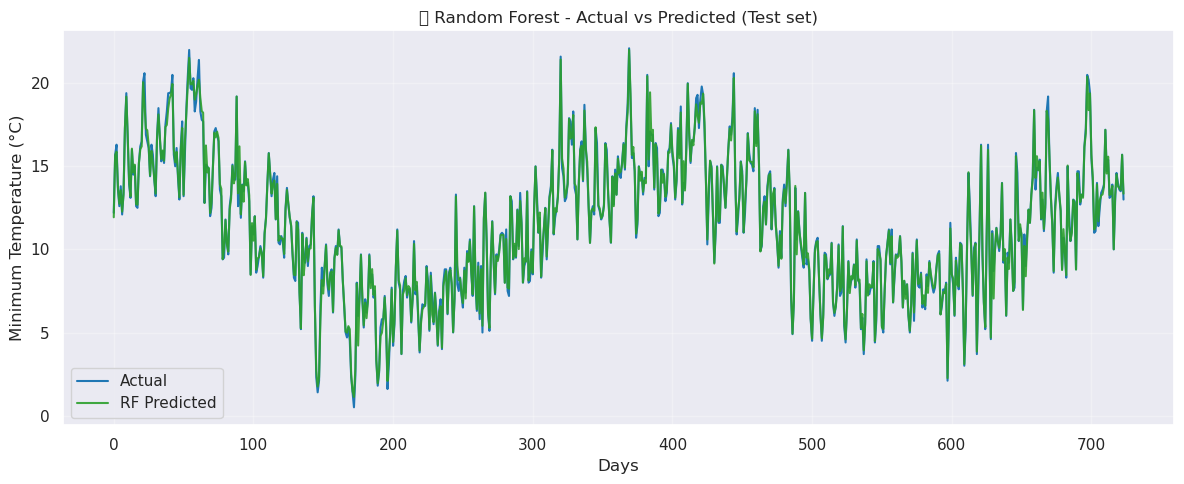


===== TOP 15 FEATURE IMPORTANCE (RF) =====
                Feature  Importance
19  temp_rolling_mean_3    0.497500
39      temp_ewm_mean_7    0.216577
37          temp_diff_1    0.112016
21   temp_rolling_min_3    0.066937
22   temp_rolling_max_3    0.052562
14           temp_lag_2    0.023431
38          temp_diff_7    0.011560
13           temp_lag_1    0.007858
20   temp_rolling_std_3    0.001536
16           temp_lag_7    0.001344
40       temp_ewm_std_7    0.001104
15           temp_lag_3    0.000615
26   temp_rolling_max_7    0.000461
25   temp_rolling_min_7    0.000449
24   temp_rolling_std_7    0.000438


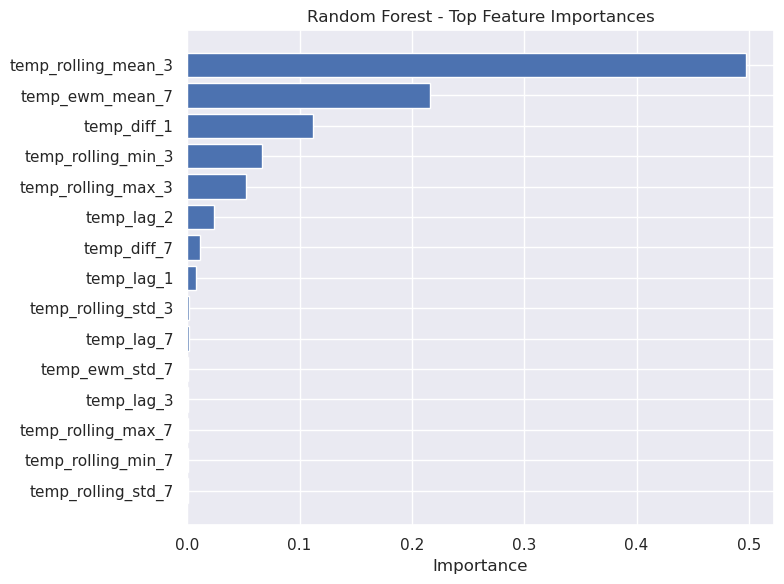


✅ Random Forest training completed!
- RF học tốt quan hệ phi tuyến/phi tham số, thường cải thiện lỗi so với Linear Regression.
- Có thể tune nhanh: n_estimators, max_depth, min_samples_leaf để tối ưu thêm.


In [31]:
# ============================
# TRAIN & EVALUATE RANDOM FOREST
# ============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# (Nếu ở trên bạn đã có evaluate_model thì đoạn dưới sẽ ghi đè cùng logic — không sao)
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    return mae, rmse, r2

# Khởi tạo RF (mặc định đã khá mạnh; có thể tune sau)
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("\n===== TRAINING RANDOM FOREST =====")
rf.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf  = rf.predict(X_test_scaled)

# Đánh giá
train_scores_rf = evaluate_model(y_train, y_pred_train_rf, "Random Forest (Train)")
test_scores_rf  = evaluate_model(y_test,  y_pred_test_rf,  "Random Forest (Test)")

# Biểu đồ dự báo
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test_rf, label="RF Predicted", color="tab:green", alpha=0.9)
plt.title("🌲 Random Forest - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# FEATURE IMPORTANCE
# ============================

importances = rf.feature_importances_
fi_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n===== TOP 15 FEATURE IMPORTANCE (RF) =====")
print(fi_df.head(15))

# Vẽ Top 15 features
topk = 15
plt.figure(figsize=(8, 6))
plt.barh(fi_df["Feature"].head(topk)[::-1], fi_df["Importance"].head(topk)[::-1])
plt.xlabel("Importance")
plt.title("Random Forest - Top Feature Importances")
plt.tight_layout()
plt.show()

print("\n✅ Random Forest training completed!")
print("- RF học tốt quan hệ phi tuyến/phi tham số, thường cải thiện lỗi so với Linear Regression.")
print("- Có thể tune nhanh: n_estimators, max_depth, min_samples_leaf để tối ưu thêm.")


### XGBoost


===== TRAINING XGBOOST =====

📊 XGBoost (Train) Evaluation:
MAE  : 0.0868
RMSE : 0.1108
R²   : 0.9992

📊 XGBoost (Test) Evaluation:
MAE  : 0.2112
RMSE : 0.2864
R²   : 0.9951


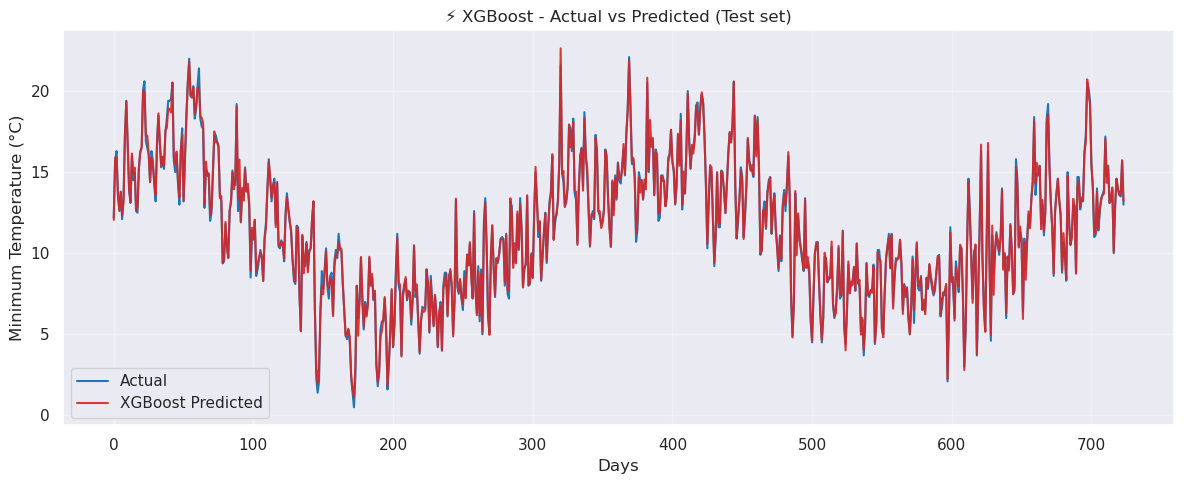

In [ ]:
# ============================
# TRAIN & EVALUATE XGBOOST + SUMMARY
# ============================

# Cài nếu thiếu: pip install xgboost
try:
    from xgboost import XGBRegressor
except ImportError as e:
    raise SystemExit("⚠️ Chưa cài xgboost. Chạy: pip install xgboost")

# Khởi tạo XGBoost (tham số an toàn, dễ hội tụ; có thể tune thêm)
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

print("\n===== TRAINING XGBOOST =====")
xgb.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_test_xgb  = xgb.predict(X_test_scaled)

# Đánh giá
train_scores_xgb = evaluate_model(y_train, y_pred_train_xgb, "XGBoost (Train)")
test_scores_xgb  = evaluate_model(y_test,  y_pred_test_xgb,  "XGBoost (Test)")

# Biểu đồ dự báo riêng XGBoost
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test_xgb, label="XGBoost Predicted", color="tab:red", alpha=0.9)
plt.title("⚡ XGBoost - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## So sánh tổng hợp 3 mô hình


=== So sánh tổng hợp (thấp hơn → tốt hơn) ===
               Model           MAE          RMSE        R2
0  Linear Regression  3.682444e-15  4.809064e-15  1.000000
1            XGBoost  2.111824e-01  2.864006e-01  0.995120
2      Random Forest  2.235977e-01  3.468140e-01  0.992844


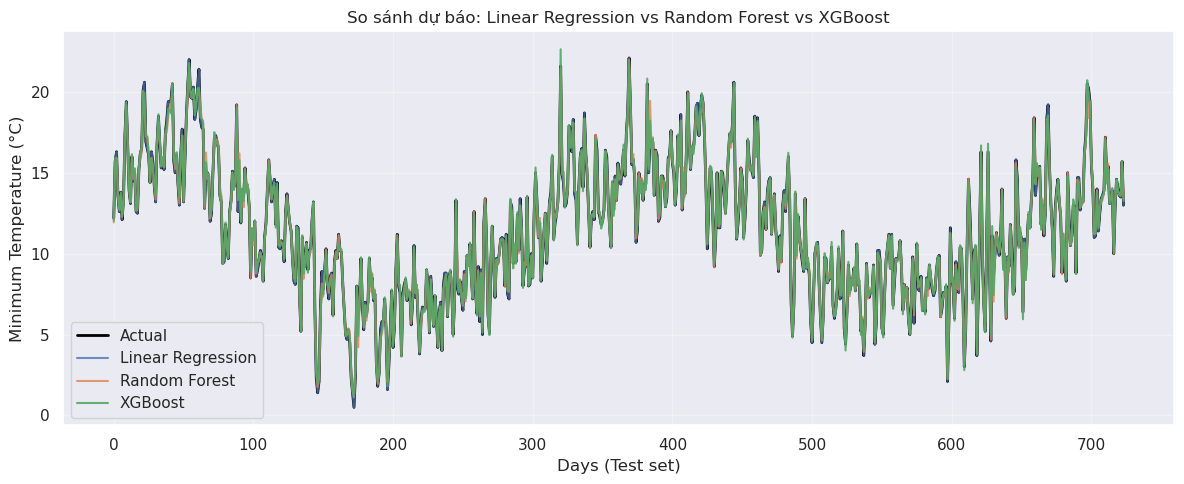

- Linear Regression đang có RMSE thấp nhất trong 3 mô hình.
- Linear Regression nhanh, dễ giải thích nhưng hạn chế với quan hệ phi tuyến.
- Random Forest học phi tuyến tốt, ít cần chuẩn hóa, thường ổn định.
- XGBoost thường thắng nhờ boosting, nhưng cần chỉnh tham số (n_estimators, learning_rate, max_depth...).


In [ ]:
# ============================
# SO SÁNH TỔNG HỢP 3 MÔ HÌNH
# ============================

# đảm bảo đã có các biến dự đoán từ các bước trước:
# - y_pred_test (Linear Regression)
# - y_pred_test_rf (Random Forest)
# - y_pred_test_xgb (XGBoost)

import numpy as np
import pandas as pd

def metrics_dict(name, y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

summary_rows = [
    metrics_dict("Linear Regression", y_test, y_pred_test),
    metrics_dict("Random Forest",     y_test, y_pred_test_rf),
    metrics_dict("XGBoost",           y_test, y_pred_test_xgb),
]
summary_df = pd.DataFrame(summary_rows).sort_values("RMSE").reset_index(drop=True)

print("\n=== So sánh tổng hợp (thấp hơn → tốt hơn) ===")
print(summary_df)

# Biểu đồ so sánh chung 3 mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", linewidth=2, color="black")
plt.plot(y_pred_test,     label="Linear Regression", alpha=0.8)
plt.plot(y_pred_test_rf,  label="Random Forest",     alpha=0.8)
plt.plot(y_pred_test_xgb, label="XGBoost",           alpha=0.9)
plt.title("So sánh dự báo: Linear Regression vs Random Forest vs XGBoost")
plt.xlabel("Days (Test set)")
plt.ylabel("Minimum Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gợi ý diễn giải cho blog (in ra console)
best = summary_df.iloc[0]["Model"]
print(f"- {best} đang có RMSE thấp nhất trong 3 mô hình.")
print("- Linear Regression nhanh, dễ giải thích nhưng hạn chế với quan hệ phi tuyến.")
print("- Random Forest học phi tuyến tốt, ít cần chuẩn hóa, thường ổn định.")
print("- XGBoost thường thắng nhờ boosting, nhưng cần chỉnh tham số (n_estimators, learning_rate, max_depth...).")